<b>¡Hola Duver!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.
¡Empecemos!


<center>
    <h1>PRIORIZACIÓN DE HIPÓTESIS Y PRUEBA A/B</h1>
</center>

# INTRODUCCIÓN

Este proyecto tiene como objetivo analizar una lista de hipótesis recopiladas en colaboración con el departamento de marketing, las cuales podrían contribuir a incrementar los ingresos de una tienda online. Se priorizarán estas hipótesis, se implementará una prueba A/B y se evaluarán los resultados para determinar las acciones más efectivas.

# PARTE 1. PRIORIZAR HIPÓTESIS

## INICIALIZACIÓN

**Importo las librerías y cargo los archivos:**

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# Cargo el dataset de hipótesis

hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

# Muestro las primeras filas del DataFrame
print("Primeras 5 filas del dataset de hipótesis:")
print(hypotheses.head())

# Muestro la información general del DataFrame
print("\nInformación general del DataFrame:")
hypotheses.info()

# Muestro los nombres de las columnas para verificar
print("\nNombres de las columnas:")
print(hypotheses.columns)

Primeras 5 filas del dataset de hipótesis:
                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effor

<div class="alert alert-block alert-success">
<b>Celda [1]</b> <a class="tocSkip"></a><br>
Excelente inicio al importar las librerías necesarias y cargar los datasets. Esto establece una base sólida para el análisis posterior. Asegúrate de que las rutas de los archivos sean correctas para evitar errores de carga.
</div>


**ANÁLISIS**

El DataFrame `hypotheses` consta de **9 filas** (entradas) y **5 columnas**. Cada fila representa una hipótesis diferente para aumentar los ingresos de la tienda online.

Número de entradas: 9. Esto significa que tenemos 9 hipótesis distintas para evaluar. 

Ausencia de valores nulos: La columna `Non-Null Count` muestra que todas las columnas tienen 9 valores no nulos, lo que significa que **no hay datos faltantes** en ninguna de las celdas. por lo tanto no necesitaremos realizar limpieza de valores nulos.

El tipo de dato de la columna 'Hypotheses' es 'object'y las demás son 'int64', lo cual es adecuado para el trabajo para los frameworks.

Todas las métricas numéricas (`Reach`, `Impact`, `Confidence`, `Effort`) utilizan una escala del 1 al 10. Esto es ideal para los frameworks ICE y RICE, ya que estas escalas relativas facilitan la comparación entre hipótesis.

**Sin embargo, antes de continuar, debemos estandarizar los nombres de las columnas de tal manera que usemos solo letras minúsculas.**


In [2]:
hypotheses.columns = hypotheses.columns.str.strip().str.lower()

print(hypotheses.columns)


Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')


<div class="alert alert-block alert-success">
<b>Celda [2]</b> <a class="tocSkip"></a><br>
Has normalizado los nombres de las columnas para eliminar espacios y convertirlos a minúsculas. Esto es una buena práctica. 
</div>


## FRAMEWORK ICE

**DESCRIPICIÓN:**

El framework ICE (Impact, Confidence, Effort) prioriza ideas o hipótesis basándose en tres factores clave:

Impacto (Impact): ¿Qué tan grande será el efecto positivo si esta hipótesis resulta ser cierta? (En este caso, cómo afectará los ingresos).

Confianza (Confidence): ¿Qué tan seguro estás de que esta hipótesis se validará o de que el impacto estimado se logrará?

Esfuerzo (Effort): ¿Cuántos recursos (tiempo, dinero, personal, etc.) se necesitan para probar e implementar esta hipótesis?

La fórmula para calcular la puntuación ICE es:

ICE=(Impact * Confidence) / Effort

Un puntaje ICE más alto indica una hipótesis con mayor prioridad, ya que promete un gran impacto y alta confianza con un esfuerzo relativamente bajo.

In [3]:

# Calculo la puntuación ICE
hypotheses['ice'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

# Ordeno las hipótesis por la puntuación ICE en orden descendente
hypotheses_ice_prioritized = hypotheses.sort_values(by='ice', ascending=False)

print("\n--- Priorización de Hipótesis usando el framework ICE ---")
# Muestro solo la hipótesis y su puntuación ICE, redondeado para mejor legibilidad
print(hypotheses_ice_prioritized[['hypothesis', 'ice']].round(2))


--- Priorización de Hipótesis usando el framework ICE ---
                                          hypothesis    ice
8  Launch a promotion that gives users discounts ...  16.20
0  Add two new channels for attracting traffic. T...  13.33
7  Add a subscription form to all the main pages....  11.20
6  Show banners with current offers and sales on ...   8.00
2  Add product recommendation blocks to the store...   7.00
1  Launch your own delivery service. This will sh...   2.00
5  Add a customer review page. This will increase...   1.33
3  Change the category structure. This will incre...   1.12
4  Change the background color on the main page. ...   1.00


<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Buen uso de funciones estadísticas para obtener una visión inicial del conjunto de datos. Este tipo de análisis favorece la comprensión rápida del contexto y ayuda a identificar posibles áreas de interés para un análisis más profundo.
</div>


**ANÁLISIS**

La hipótesis **"Launch a promotion that gives users discounts..."** (puntuación ICE de 16.20) es la que tiene la mayor prioridad según este framework. Esto sugiere que ofrece un buen equilibrio entre alto impacto, alta confianza y un esfuerzo manejable.

Las hipótesis **"Add two new channels for attracting traffic..."** (13.33) y **"Add a subscription form to all the main pages..."** (11.20) también son consideradas de alta prioridad.

Las hipótesis como "Change the background color on the main page..." (1.00) y "Change the category structure..." (1.12) tienen puntuaciones ICE muy bajas, lo que indica que, a pesar de su posible impacto o confianza, el esfuerzo requerido podría no justificarlas o viceversa.

## FRAMEWORK RICE

**DESCRIPCIÓN:**

La diferencia clave con ICE es la inclusión de Reach (Alcance). Esta métrica considera cuántos usuarios se verán afectados por la hipótesis.

La fórmula para calcular la puntuación RICE es:

RICE=(Reach * Impact * Confidence) / Effort

La inclusión de Reach importante porque una hipótesis con un gran impacto y alta confianza, pero que solo afecta a un pequeño número de usuarios, podría tener una prioridad menor que una hipótesis con un impacto ligeramente menor pero que afecta a una audiencia mucho más amplia.

In [4]:
# Calculo la puntuación RICE
hypotheses['rice'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

# Ordeno las hipótesis por la puntuación RICE en orden descendente
hypotheses_rice_prioritized = hypotheses.sort_values(by='rice', ascending=False)

print("\n--- Priorización de Hipótesis usando el framework RICE ---")
# Muestro solo la hipótesis y su puntuación RICE, redondeado para mejor legibilidad
print(hypotheses_rice_prioritized[['hypothesis', 'rice']].round(2))


--- Priorización de Hipótesis usando el framework RICE ---
                                          hypothesis   rice
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


<div class="alert alert-block alert-warning">
<b>Celda [4]</b> <a class="tocSkip"></a><br>
Has calculado correctamente las puntuaciones RICE e ICE para priorizar hipótesis. Sería útil incluir una breve interpretación de los resultados para contextualizar la importancia de estas métricas en la priorización de las hipótesis, lo cual puede guiar la toma de decisiones estratégicas.
</div>


**ANÁLISIS:**

Con este framework, la prioridad más alta, de lejos, la tiene la hipótesis **"Add a subscription form to all the main pages...."** con una puntuación de 112

## COMPARACIÓN ICE vs. RICE

**Los cambios más notables fueron:**

* **"Add a subscription form to all the main pages..."**:
    * **ICE Rank:** 3ra (11.20)
    * **RICE Rank:** 1ra (112.00)
    * **Explicación:** Esta hipótesis experimentó el salto más grande. Aunque ya tenía una buena puntuación ICE, su **alto `Reach`** (seguramente afecta a una gran cantidad de visitantes al estar en "todas las páginas principales") la catapulta a la primera posición en RICE. Esto significa que, si bien el impacto o la confianza por usuario podrían no ser los más altos individualmente, el hecho de que afectará a **muchísimos usuarios** la convierte en la prioridad máxima.
      

* **"Add product recommendation blocks to the store..."**:
    * **ICE Rank:** 5ta (7.00)
    * **RICE Rank:** 2da (56.00)
    * **Explicación:** También subió significativamente. Esto sugiere que, a pesar de no ser la top en ICE, tiene un **`Reach` considerable** (probablemente afecta a muchos usuarios al navegar por la tienda), lo que la hace muy valiosa cuando se considera el número de personas impactadas.

* **"Launch a promotion that gives users discounts..."**:
    * **ICE Rank:** 1ra (16.20)
    * **RICE Rank:** 5ta (16.20)
    * **Explicación:** Esta hipótesis fue la **número 1 en ICE**, pero cayó a la quinta posición en RICE. La razón es evidente: su **`Reach` es probablemente bajo** en comparación con otras hipótesis. Si bien tiene un impacto y confianza fuertes, el hecho de que solo llegue a un segmento más pequeño de usuarios (por ejemplo, a través de canales muy específicos o a un público muy nicho) reduce su prioridad general cuando se considera el volumen de usuarios afectados. Es un buen ejemplo de cómo una hipótesis poderosa en impacto individual puede no ser la más escalable si su alcance es limitado.

* **"Add two new channels for attracting traffic..."** y **"Show banners with current offers and sales on..."**:
    * **ICE Rank:** 2da y 4ta, respectivamente.
    * **RICE Rank:** 3ra y 4ta, respectivamente (ambas con 40.00).
    * **Explicación:** Estas hipótesis mantuvieron una alta prioridad, aunque sus posiciones relativas entre sí cambiaron ligeramente. Su `Reach` es probablemente considerable, lo que las mantiene competitivas en RICE.


# PARTE 2. ANÁLISIS DEL TEST A/B

Se realizó una prueba A/B y se obtuvieron los resultados descritos en los archivos `orders_us.csv` y `visits_us.csv`.

## INICIALIZACIÓN

**Cargo los Datasets**

In [5]:
# Cargo los datasets
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

print("Primeras 5 filas del dataset de órdenes:")
print(orders.head())
print("\nInformación general del dataset de órdenes:")
orders.info()

print("\n---\n")

print("Primeras 5 filas del dataset de visitas:")
print(visits.head())
print("\nInformación general del dataset de visitas:")
visits.info()

Primeras 5 filas del dataset de órdenes:
   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B

Información general del dataset de órdenes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB

---

Primeras 5 filas del dataset de visitas:
         date group  visits
0  2019-08-01     A     71

<div class="alert alert-block alert-success">
<b>Celda [5]</b> <a class="tocSkip"></a><br>
La carga y visualización inicial de los datasets de órdenes y visitas es clara y completa. Esto asegura que entiendes bien la estructura de los datos con los que trabajarás, lo cual es fundamental para un análisis preciso.
</div>


**Verificación y limpieza de los datos**

In [6]:
# Convierto las columnas de fecha a tipo datetime
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

# Renombro las columnas para consistencia y facilidad de uso (snake_case)
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

print("\n--- DataFrames después de la conversión de tipos y renombrado de columnas ---")
print("Dataset de órdenes (head):\n", orders.head())
print("\nDataset de visitas (head):\n", visits.head())
print("\nOrders info (después de datetime):\n")
orders.info()
print("\nVisits info (después de datetime):\n")
visits.info()


--- DataFrames después de la conversión de tipos y renombrado de columnas ---
Dataset de órdenes (head):
    transaction_id  visitor_id       date  revenue group
0      3667963787  3312258926 2019-08-15     30.4     B
1      2804400009  3642806036 2019-08-15     15.2     B
2      2961555356  4069496402 2019-08-15     10.2     A
3      3797467345  1196621759 2019-08-15    155.1     B
4      2282983706  2322279887 2019-08-15     40.5     B

Dataset de visitas (head):
         date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756

Orders info (después de datetime):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date      

<div class="alert alert-block alert-success">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
La conversión de columnas de fecha a tipo datetime es esencial para análisis temporales. 
</div>


In [7]:
# Verificación de visitantes en ambos grupos A y B

# Obtengo los IDs de visitantes únicos para cada grupo del dataset de órdenes
visitors_in_group_a = orders[orders['group'] == 'A']['visitor_id'].unique()
visitors_in_group_b = orders[orders['group'] == 'B']['visitor_id'].unique()

print(f"\nNúmero de visitantes únicos en el Grupo A: {len(visitors_in_group_a)}")
print(f"Número de visitantes únicos en el Grupo B: {len(visitors_in_group_b)}")



Número de visitantes únicos en el Grupo A: 503
Número de visitantes únicos en el Grupo B: 586


In [8]:
# Encuentro los visitantes que están presentes en AMBOS grupos
visitors_in_both_groups = set(visitors_in_group_a) & set(visitors_in_group_b)

print(f"\nNúmero de visitantes encontrados en AMBOS grupos (A y B): {len(visitors_in_both_groups)}")

# Excluyo a estos visitantes del DataFrame de órdenes
# Usamos .copy() para asegurarnos de trabajar con una copia independiente del DataFrame
orders_filtered = orders[~orders['visitor_id'].isin(visitors_in_both_groups)].copy()

print(f"\nNúmero de órdenes ANTES de filtrar: {len(orders)}")
print(f"Número de órdenes DESPUÉS de filtrar (excluyendo visitantes en ambos grupos): {len(orders_filtered)}")



Número de visitantes encontrados en AMBOS grupos (A y B): 58

Número de órdenes ANTES de filtrar: 1197
Número de órdenes DESPUÉS de filtrar (excluyendo visitantes en ambos grupos): 1016


<div class="alert alert-block alert-success">
<b>Celda [8]</b> <a class="tocSkip"></a><br>
Excelente trabajo al identificar y excluir visitantes que están en ambos grupos. Esto es crucial para evitar sesgos en el análisis A/B y asegurar la validez de los resultados.
</div>


In [9]:
# Me aseguro de que no queden usuarios duplicados
visitors_group_a_filtered = orders_filtered[orders_filtered['group'] == 'A']['visitor_id'].unique()
visitors_group_b_filtered = orders_filtered[orders_filtered['group'] == 'B']['visitor_id'].unique()
visitors_in_both_groups_after_filter = set(visitors_group_a_filtered) & set(visitors_group_b_filtered)

if len(visitors_in_both_groups_after_filter) == 0:
    print("\n¡Verificación exitosa! No quedan visitantes en ambos grupos en 'orders_filtered'.")
else:
    print(f"Advertencia: Aún hay {len(visitors_in_both_groups_after_filter)} visitantes en ambos grupos después del filtrado. Revisa el código.")




¡Verificación exitosa! No quedan visitantes en ambos grupos en 'orders_filtered'.


**ANÁLISIS:**

Se convirtió exitosamente la columna date en ambos DataFrames (orders y visits) al tipo datetime64. Esto es necesario para realizar operaciones de tiempo, como agrupar por día o calcular rangos de fechas.

También se renombró transactionId a transaction_id y visitorId a visitor_id en el DataFrame orders. Esto mejora la legibilidad y la consistencia con las convenciones de nombres en Python (snake_case).

Identificación y Exclusión de Visitantes Duplicados:

Visitantes únicos por grupo: Había 503 visitantes únicos en el Grupo A y 586 en el Grupo B.
Visitantes en ambos grupos: Lo más importante, se encontraron 58 visitantes que estaban presentes tanto en el Grupo A como en el Grupo B. Esto es un hallazgo significativo, ya que estos usuarios podrían haber sesgado los resultados del test si no se hubieran manejado. Su inclusión podría hacer que las diferencias entre los grupos parezcan mayores o menores de lo que realmente son, o atribuir el efecto a un grupo cuando el usuario ya estaba expuesto al otro.

Después de la exclusión, el número de órdenes se redujo de 1197 a 1016. Esto significa que se eliminaron todas las órdenes asociadas con esos 58 visitantes problemáticos.

La confirmación "¡Verificación exitosa! No quedan visitantes en ambos grupos en 'orders_filtered'." inidca que ahora, el DataFrame orders_filtered contiene solo usuarios que fueron asignados de manera limpia a un único grupo A o B, lo cual es fundamental para un análisis A/B válido y confiable.

**Nota: Para el DataFrame 'visits', dado que es a nivel de fecha/grupo y no por 'visitor_id' individual, no es necesario un filtrado similar directo a menos que se re-calcule el número de visitas basándose en los usuarios filtrados, lo cual es más complejo y a menudo no se hace para el propósito de este tipo de análisis de A/B. Mantenemos 'visits' como está.**

## ANÁLISIS DEL TEST

### Representación gráfica del ingreso acumulado por grupo.

Para representar el ingreso acumulado, primero necesitamos construir un DataFrame que contenga los datos acumulados diarios para cada grupo. Esto implica:

- Obtener todas las fechas únicas y grupos.
- Calcular el número acumulado de órdenes, el ingreso acumulado y el número acumulado de visitantes únicos para cada grupo por día.
- Combinar estos datos para facilitar la graficación.

Usaremos los DataFrames orders_filtered (el limpio, sin usuarios duplicados en ambos grupos) y visits.

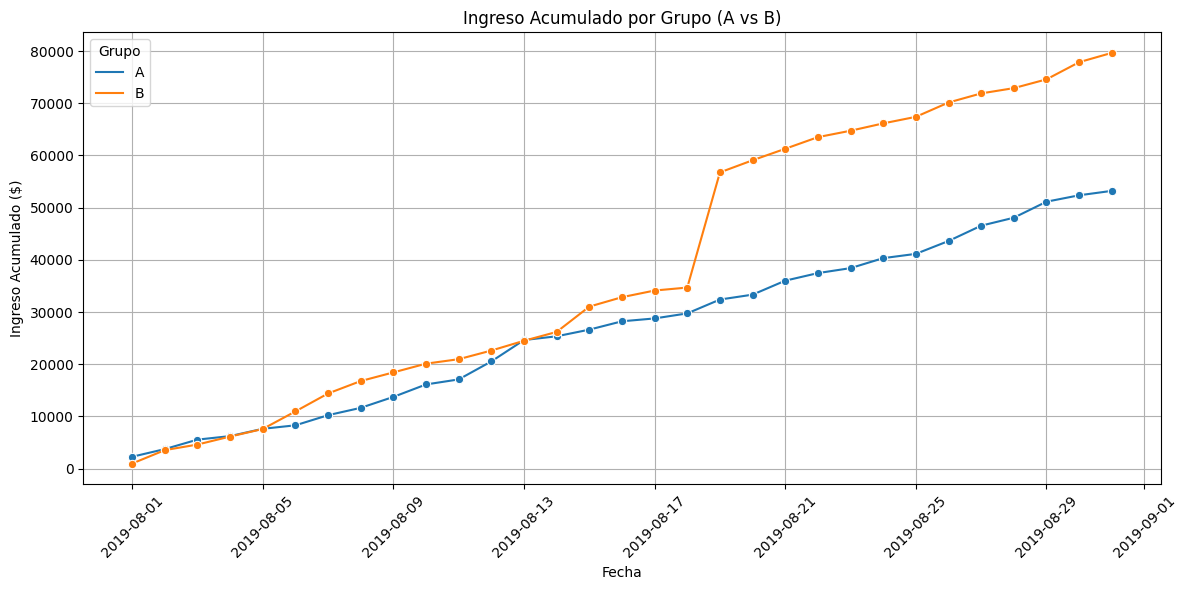

In [10]:
# Creo un DataFrame con fechas y grupos únicos para asegurar todas las combinaciones día-grupo
dates_groups = orders_filtered[['date', 'group']].drop_duplicates().sort_values(by=['date', 'group'])

# Agrupo órdenes por fecha y grupo, y luego acumulo
# Calculo número de órdenes acumuladas y ingresos acumulados por grupo y fecha
cumulative_orders = (
    orders_filtered.groupby(['date', 'group'])
    .agg({'transaction_id': 'nunique', 'visitor_id': 'nunique', 'revenue': 'sum'})
    .sort_values(by=['date', 'group'])
    .rename(columns={'transaction_id': 'orders', 'visitor_id': 'buyers'}) # Renombrar para claridad
)


# Uno con dates_groups para asegurar que todas las fechas estén presentes
cumulative_data = dates_groups.merge(cumulative_orders, on=['date', 'group'], how='left')

# Relleno los NaN que puedan surgir si no hubo órdenes en un día específico para un grupo
cumulative_data = cumulative_data.fillna(0)

# Calculo los acumulados usando `groupby` y `cumsum`
cumulative_data['cumulative_orders'] = cumulative_data.groupby('group')['orders'].cumsum()
cumulative_data['cumulative_buyers'] = cumulative_data.groupby('group')['buyers'].cumsum()
cumulative_data['cumulative_revenue'] = cumulative_data.groupby('group')['revenue'].cumsum()

# Me aseguro de que el DataFrame `visits` también tenga las fechas ordenadas para el acumulado
visits_sorted = visits.sort_values(by=['date', 'group'])
visits_sorted['cumulative_visits'] = visits_sorted.groupby('group')['visits'].cumsum()

# Ahora, uno los datos de visitas acumuladas con los datos de órdenes acumuladas
full_cumulative_data = cumulative_data.merge(visits_sorted[['date', 'group', 'cumulative_visits']],
                                              on=['date', 'group'], how='left')

# Me aseguro de que 'cumulative_visits' no tenga NaN si alguna fecha no coincidió
full_cumulative_data['cumulative_visits'] = full_cumulative_data['cumulative_visits'].fillna(method='ffill')
full_cumulative_data['cumulative_visits'] = full_cumulative_data['cumulative_visits'].fillna(0) # Por si acaso hay valores al inicio

# Grafico el ingreso acumulado por grupo

plt.figure(figsize=(12, 6))
sns.lineplot(data=full_cumulative_data, x='date', y='cumulative_revenue', hue='group', marker='o')
plt.title('Ingreso Acumulado por Grupo (A vs B)')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Acumulado ($)')
plt.grid(True)
plt.legend(title='Grupo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-success">
<b>Celda [10]</b> <a class="tocSkip"></a><br>
Has creado un gráfico de ingreso acumulado por grupo, lo cual es excelente para visualizar tendencias a lo largo del tiempo. 
</div>


**CONCLUSIONES Y CONJETURAS:**

**Crecimiento Constante en Ambos Grupos:** Ambas líneas (Grupo A y Grupo B) muestran una tendencia ascendente clara a lo largo del tiempo, lo cual es lo esperado. Los ingresos están creciendo en ambos grupos a medida que transcurren los días del experimento.
**Grupo B con Mayor Ingreso Acumulado:** Desde el inicio, el Grupo B parece tener una ligera ventaja en términos de ingreso acumulado, y esta diferencia se amplía significativamente hacia el final del periodo del test. Al cierre, el Grupo B tiene un ingreso acumulado considerablemente mayor que el Grupo A.

La observación más llamativa en la gráfica es el **salto abrupto en la línea del Grupo B alrededor del 18-19 de agosto**.

* **Pico de Ingreso en el Grupo B:** La línea naranja (Grupo B) muestra un incremento vertical muy pronunciado en un corto período de tiempo, mientras que la línea azul (Grupo A) mantiene un crecimiento más gradual y constante.
  
* **Posible Causa: Pedidos Atípicos (Outliers):** La conjetura más fuerte y probable para este tipo de comportamiento es la presencia de **uno o varios pedidos de un valor extraordinariamente alto (outliers)** en el Grupo B alrededor de esa fecha. Estos pocos pedidos de gran valor inflan artificialmente el ingreso acumulado del Grupo B, haciendo que parezca mucho más exitoso de lo que realmente es en términos de comportamiento general de los usuarios.

**Implicaciones**

* **Distorsión de Métricas:** Si este pico se debe a outliers, significa que el ingreso acumulado por sí solo puede estar distorsionando la verdadera "performance" promedio del Grupo B.
* **Necesidad de Análisis de Outliers:** Este gráfico nos da una señal muy fuerte de que necesitamos investigar los valores atípicos en los ingresos de los pedidos. Es fundamental identificar estos pedidos inusualmente grandes y decidir cómo manejarlos.
* **Impacto en Pruebas Estadísticas:** Si realizamos pruebas estadísticas directamente sobre los ingresos crudos con estos outliers, los resultados podrían ser engañosos. Las pruebas de hipótesis (como la prueba de Mann-Whitney U que usaremos para comparar grupos) son sensibles a valores extremos y podrían indicar una diferencia significativa donde, en realidad, el efecto no es generalizado sino impulsado por unos pocos casos excepcionales.


### Representación gráfica del tamaño de pedido promedio acumulado por grupo.

Para calcular y graficar el tamaño de pedido promedio acumulado, usaremos el mismo full_cumulative_data que creamos antes, ya que contiene cumulative_revenue y cumulative_orders.


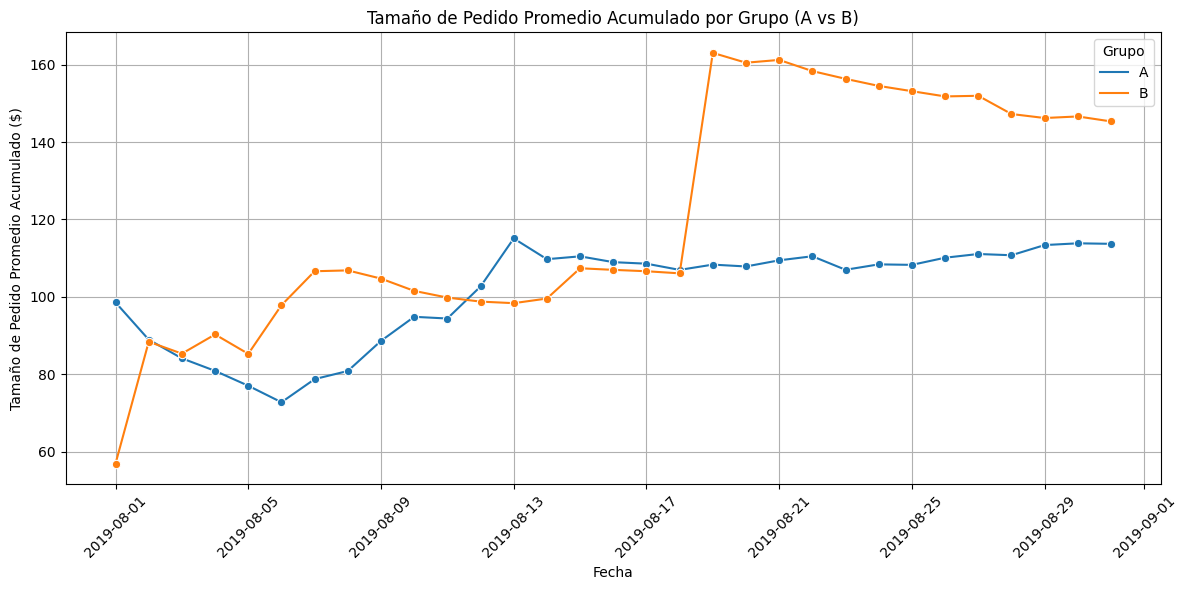

In [11]:
# Calculo el tamaño de pedido promedio acumulado
full_cumulative_data['cumulative_average_order_value'] = (
    full_cumulative_data['cumulative_revenue'] / full_cumulative_data['cumulative_orders']
)

# Grafico el tamaño de pedido promedio acumulado por grupo

plt.figure(figsize=(12, 6))
sns.lineplot(data=full_cumulative_data, x='date', y='cumulative_average_order_value', hue='group', marker='o')
plt.title('Tamaño de Pedido Promedio Acumulado por Grupo (A vs B)')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de Pedido Promedio Acumulado ($)')
plt.grid(True)
plt.legend(title='Grupo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**CONCLUSIONES Y CONJETURAS:**

**Grupo A Estable:** La línea azul (Grupo A) muestra que el tamaño de pedido promedio acumulado se estabiliza gradualmente alrededor de los \$110-\$115. Hay fluctuaciones iniciales, lo cual es normal, pero la tendencia final es de estabilidad.

**Grupo B con Comportamiento Inusual:** La línea naranja (Grupo B) presenta un comportamiento muy similar al observado en la gráfica de ingreso acumulado.

La observación más crítica es el **salto abrupto en la línea del Grupo B alrededor del 18-19 de agosto**, seguido de una ligera tendencia a la baja, pero manteniéndose muy por encima del Grupo A.

**Confirmación de Outliers:** Este salto masivo en el tamaño de pedido promedio acumulado del Grupo B en la misma fecha donde vimos el pico en el ingreso acumulado es una confirmación sólida de que hay uno o varios **pedidos extremadamente grandes (outliers)** en el Grupo B alrededor de esa fecha. Si el AOV promedio de repente se dispara, solo puede significar que se incluyeron valores de pedidos muy altos que están arrastrando el promedio hacia arriba.

* **Impacto de los Outliers:** Estos outliers están distorsionando la métrica del tamaño de pedido promedio para el Grupo B. Sin ellos, es probable que la línea naranja se pareciera más a la azul o que la diferencia fuera mucho menos pronunciada.
  
* **Posible Engaño:** Si se concluyera que el Grupo B es significativamente mejor basándose únicamente en el ingreso acumulado o el AOV promedio actual, se podría estar tomando una decisión errónea, ya que el rendimiento no sería representativo del comportamiento general de la mayoría de los usuarios.

**Implicaciones:**

La presencia de estos outliers es un factor crítico para el siguiente paso en nuestro análisis estadístico:

* **Necesidad de Filtrar o Limitar Outliers:** Para obtener una comparación justa y estadísticamente válida entre los grupos, es imperativo identificar y manejar estos valores atípicos. Las pruebas estadísticas estándar, como las pruebas paramétricas (por ejemplo, t-test) o incluso no paramétricas si son muy extremos, pueden ser fuertemente influenciadas por estos valores.
* 
* **Enfoque en el Comportamiento Típico:** Nuestro objetivo es entender el impacto de la hipótesis en el comportamiento *típico* de los usuarios, no el efecto de uno o dos grandes compradores.


### Representación gráfica de la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

La diferencia relativa se calcula como:

Diferencia Relativa = ((Valor del Grupo B − Valor del Grupo A)/ Valor del Grupo A ) * 100

Esto nos mostrará el porcentaje de mejora (o detrimento) del Grupo B con respecto al Grupo A en el tiempo.

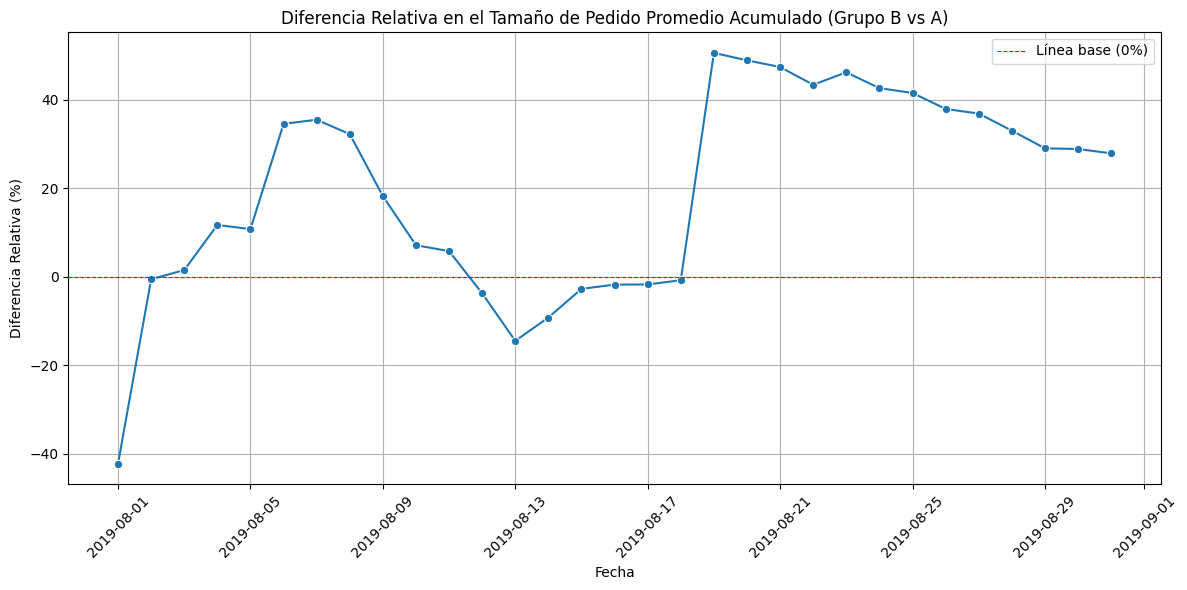

In [12]:
# Obtengo los datos acumulados para el Grupo A
cumulative_data_A = full_cumulative_data[full_cumulative_data['group'] == 'A'][['date', 'cumulative_average_order_value']]
cumulative_data_A.columns = ['date', 'cumulative_average_order_value_A']

# Obtengo los datos acumulados para el Grupo B
cumulative_data_B = full_cumulative_data[full_cumulative_data['group'] == 'B'][['date', 'cumulative_average_order_value']]
cumulative_data_B.columns = ['date', 'cumulative_average_order_value_B']

# Uno los DataFrames para comparar lado a lado
merged_cumulative_aov = cumulative_data_A.merge(cumulative_data_B, on='date', how='inner')

# Calculo la diferencia relativa en el tamaño de pedido promedio acumulado
merged_cumulative_aov['relative_aov_diff'] = (
    (merged_cumulative_aov['cumulative_average_order_value_B'] - merged_cumulative_aov['cumulative_average_order_value_A']) /
    merged_cumulative_aov['cumulative_average_order_value_A'] * 100
)

# Graficar la diferencia relativa

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_cumulative_aov, x='date', y='relative_aov_diff', marker='o')
plt.title('Diferencia Relativa en el Tamaño de Pedido Promedio Acumulado (Grupo B vs A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Relativa (%)')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--', linewidth=0.8, label='Línea base (0%)') # Línea de cero para referencia
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**CONCLUSIONES Y CONJETURAS:**

**Fluctuación Inicial:** Al principio del test (primeros días de agosto), la diferencia relativa es muy volátil, con grandes caídas y subidas. Esto es completamente normal y esperado debido al pequeño número de transacciones en los primeros días. Un solo pedido atípico puede sesgar fuertemente las métricas acumuladas en ese período.

**Estabilización Cerca de Cero:** Entre el 13 y el 17 de agosto aproximadamente, la diferencia relativa se acerca a cero, e incluso se mantiene ligeramente negativa, lo que sugeriría que, antes del evento atípico, el tamaño de pedido promedio del Grupo B era similar o incluso ligeramente inferior al del Grupo A.

**Salto Masivo y Distorsión Sostenida:** La característica más prominente y crucial es el **salto vertical masivo alrededor del 18-19 de agosto**. La diferencia relativa se dispara de casi 0% a más del 40%.

Este pico confirma de manera irrefutable que uno o varios pedidos extremadamente grandes ocurrieron en el Grupo B en esa fecha.

Después de este salto, la línea se mantiene en un rango positivo elevado (por encima del 25%), lo que indica que estos pedidos atípicos continúan influyendo en el promedio acumulado del Grupo B hasta el final del test, haciendo que su tamaño de pedido promedio acumulado parezca significativamente mayor que el del Grupo A.

**Impacto de Outliers Dominante:** El efecto de esos pocos pedidos grandes es tan pronunciado que **domina por completo la métrica del tamaño de pedido promedio acumulado** del Grupo B. Esto significa que la diferencia observada entre los grupos podría no ser un reflejo del rendimiento general de la hipótesis, sino más bien el resultado de eventos aislados.

**Resultados No Confiables (Sin Filtrado):** Si basáramos nuestras conclusiones en esta gráfica sin manejar los outliers, podríamos llegar a la conclusión errónea de que el Grupo B es inherentemente mejor en términos de AOV, cuando en realidad, solo se benefició de la suerte de recibir uno o dos pedidos masivos.

**Necesidad Crítica de Filtrado:** Esta visualización subraya la urgencia y la importancia de identificar y eliminar o limitar estos valores atípicos antes de realizar cualquier prueba estadística. Sin este paso, las inferencias estadísticas sobre el AOV podrían ser inválidas.



### Cálculo de la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día y representación gráficamente de las tasas de conversión diarias de los dos grupos. 

Para calcular la tasa de conversión acumulada, utilizaremos el DataFrame full_cumulative_data que creamos previamente, el cual ya contiene cumulative_orders y cumulative_visits.

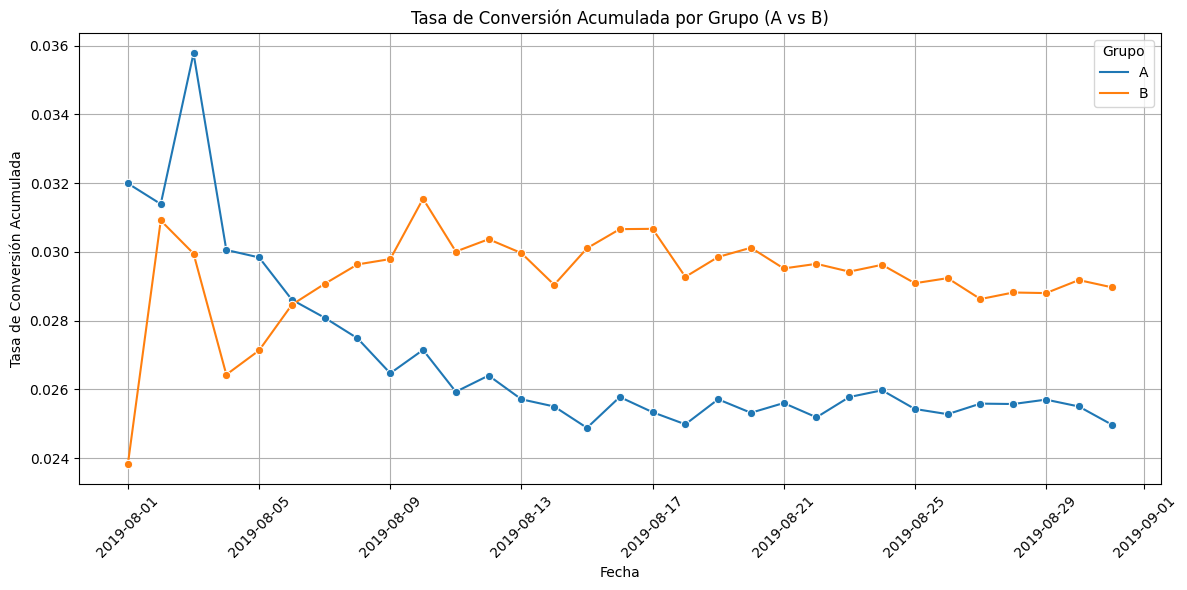

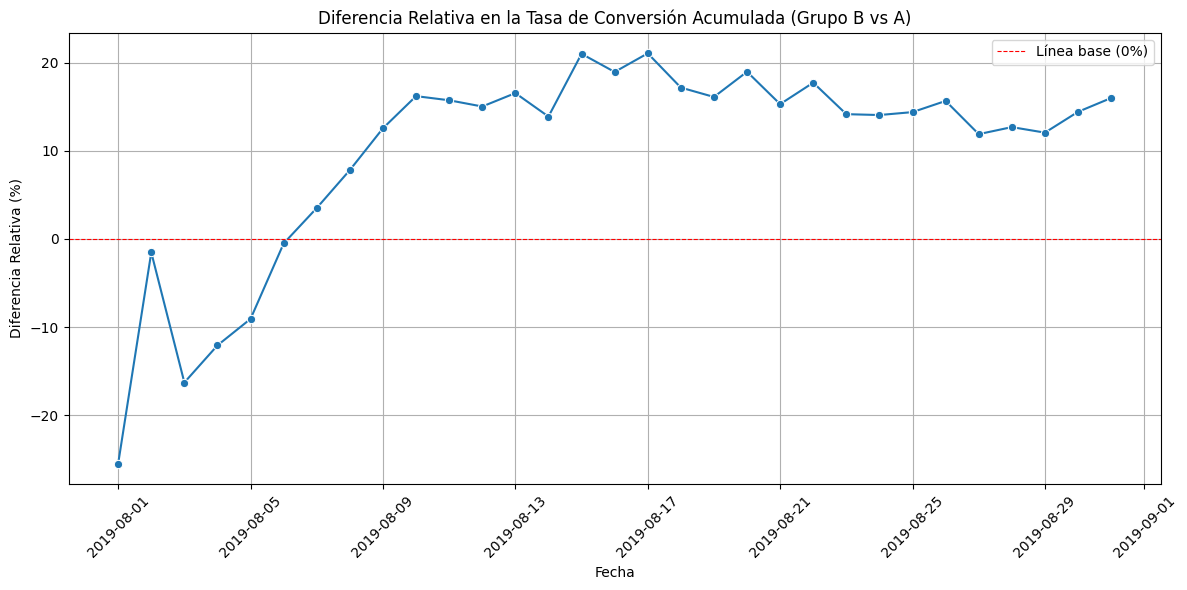

In [13]:
# Calculo la tasa de conversión acumulada
full_cumulative_data['cumulative_conversion'] = (
    full_cumulative_data['cumulative_orders'] / full_cumulative_data['cumulative_visits']
)

# Grafico la tasa de conversión acumulada por grupo

plt.figure(figsize=(12, 6))
sns.lineplot(data=full_cumulative_data, x='date', y='cumulative_conversion', hue='group', marker='o')
plt.title('Tasa de Conversión Acumulada por Grupo (A vs B)')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión Acumulada')
plt.grid(True)
plt.legend(title='Grupo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grafico la diferencia relativa de la conversión acumulada de manera similar a lo que hicimos para el AOV

# Obtengo los datos de conversión acumulada para el Grupo A
cumulative_conversion_A = full_cumulative_data[full_cumulative_data['group'] == 'A'][['date', 'cumulative_conversion']]
cumulative_conversion_A.columns = ['date', 'cumulative_conversion_A']

# Obtengo los datos de conversión acumulada para el Grupo B
cumulative_conversion_B = full_cumulative_data[full_cumulative_data['group'] == 'B'][['date', 'cumulative_conversion']]
cumulative_conversion_B.columns = ['date', 'cumulative_conversion_B']

# Uno los DataFrames para comparar lado a lado
merged_cumulative_conversion = cumulative_conversion_A.merge(cumulative_conversion_B, on='date', how='inner')

# Calculo la diferencia relativa en la tasa de conversión acumulada
merged_cumulative_conversion['relative_conversion_diff'] = (
    (merged_cumulative_conversion['cumulative_conversion_B'] - merged_cumulative_conversion['cumulative_conversion_A']) /
    merged_cumulative_conversion['cumulative_conversion_A'] * 100
)


plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_cumulative_conversion, x='date', y='relative_conversion_diff', marker='o')
plt.title('Diferencia Relativa en la Tasa de Conversión Acumulada (Grupo B vs A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Relativa (%)')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--', linewidth=0.8, label='Línea base (0%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [13]</b> <a class="tocSkip"></a><br>
La visualización de la tasa de conversión acumulada es muy informativa.
</div>


**CONCLUSIONES Y CONJETURAS:**

**Gráfico de Tasa de Conversión Acumulada por Grupo (Arriba)**

* **Comportamiento Inicial Volátil:** Como era de esperar, los primeros días (hasta alrededor del 5-7 de agosto) muestran una alta volatilidad para ambos grupos. Esto es normal debido al bajo volumen de datos en el inicio del experimento.
  
* **Grupo A (Azul) - Comienza Alto, Luego Cae:** La línea del Grupo A empieza con una tasa de conversión relativamente alta (alrededor del 3.2% - 3.6%) pero luego muestra una tendencia a la baja y se estabiliza alrededor del 2.5% - 2.6% hacia el final del período.

* **Grupo B (Naranja) - Comienza Bajo, Luego Sube y Estabiliza:** El Grupo B comienza con una tasa de conversión más baja que el Grupo A, pero rápidamente muestra una tendencia ascendente, cruza al Grupo A y se estabiliza en un nivel más alto, alrededor del 2.9% - 3.0%.

* **Conclusión:** Hacia el final del test, el **Grupo B muestra una tasa de conversión acumulada consistentemente más alta** que el Grupo A. Esto sugiere que la hipótesis implementada en el Grupo B podría estar logrando que un porcentaje mayor de visitantes realice una compra, independientemente del valor de esa compra.

**Gráfico de Diferencia Relativa en la Tasa de Conversión Acumulada (Grupo B vs A) (Abajo)** 

* **Fluctuaciones Iniciales Significativas:** Al principio, la diferencia relativa es muy inestable, llegando a ser muy negativa. Esto se debe a que, con pocos datos, pequeñas variaciones diarias tienen un gran impacto en el porcentaje.
  
* **Cruza la Línea del Cero y se Vuelve Positiva:** Después de las fluctuaciones iniciales, la línea de diferencia relativa cruza el 0% alrededor del 7-8 de agosto y se vuelve consistentemente positiva.

* **Estabilización de la Ganancia:** Desde aproximadamente el 10 de agosto en adelante, la diferencia relativa para el Grupo B en comparación con el Grupo A se mantiene consistentemente positiva, estabilizándose en un rango que oscila entre el 15% y el 20%. Hacia el final del test, parece consolidarse por encima del 10%.

* **Conclusión Clave:** Este gráfico confirma que, después de un período inicial de asentamiento, el **Grupo B ha logrado una mejora relativa significativa y sostenida en su tasa de conversión** en comparación con el Grupo A. No vemos los picos extremos que observamos en los gráficos de ingresos y AOV, lo que refuerza la idea de que la mejora en la conversión es más "saludable" y menos dependiente de outliers.

* **Éxito en Conversión:** Parece que la hipótesis del Grupo B está siendo exitosa en su objetivo de **convertir a más visitantes en compradores**. Esto es un buen indicio del impacto positivo de la hipótesis.

* **Métricas Dispares:** Tenemos una situación interesante:

    * **AOV:** Muy influenciado por outliers en el Grupo B, mostrando una gran diferencia.
    * **Conversión:** Muestra una mejora consistente y menos volátil para el Grupo B.
      
* Los gráficos de ingresos y AOV señalan que hay outliers. Si bien la conversión parece limpia, para tener una imagen completa y justa del rendimiento y para las pruebas estadísticas de *ingresos y AOV*, es absolutamente necesario identificar y manejar esos outliers.

* Si la hipótesis es buena para convertir, y si podemos mitigar el efecto de los outliers en los ingresos, la combinación de una mejor conversión y un AOV base saludable podría resultar en un aumento general de los ingresos.


### Gráfico de dispersión del número de pedidos por usuario.

Para esto, primero calculamos cuántos pedidos hizo cada `visitor_id` en el DataFrame `orders_filtered`.

Primeras 5 filas del DataFrame de pedidos por usuario:
   visitor_id  orders
0     5114589       1
1     6958315       1
2    11685486       1
3    39475350       1
4    47206413       1

Número total de usuarios únicos con pedidos: 973


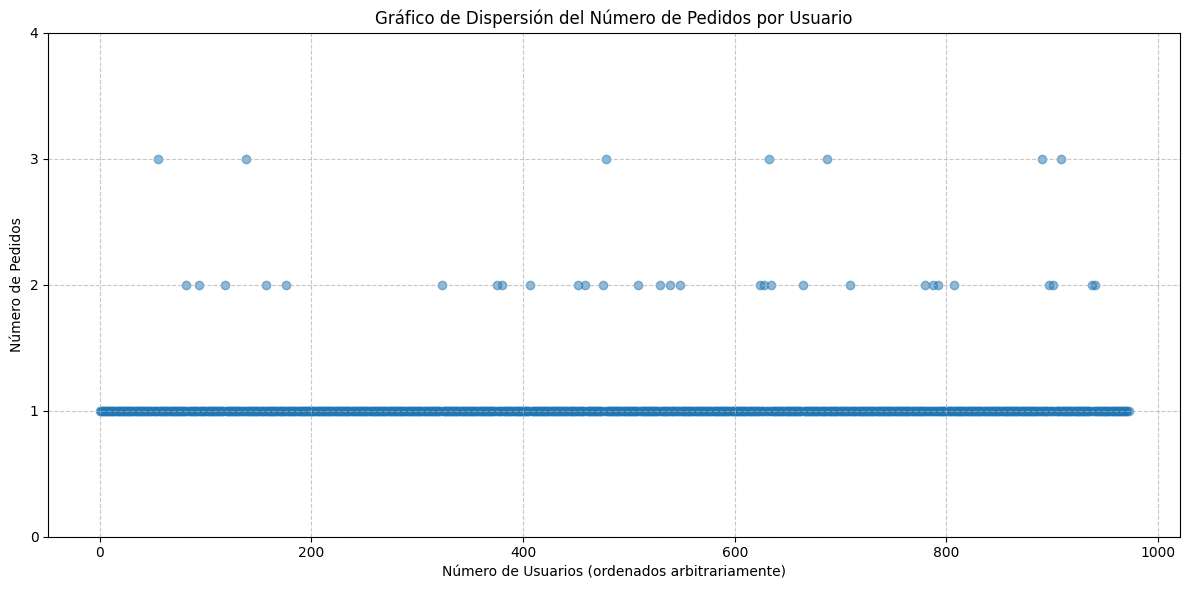

In [14]:
# Cuento el número de pedidos por cada usuario
orders_by_user = orders_filtered.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
orders_by_user.columns = ['visitor_id', 'orders']

print("Primeras 5 filas del DataFrame de pedidos por usuario:")
print(orders_by_user.head())
print(f"\nNúmero total de usuarios únicos con pedidos: {len(orders_by_user)}")


# --- Trazo el gráfico de dispersión del número de pedidos por usuario ---
plt.figure(figsize=(12, 6))
plt.scatter(x=pd.Series(range(0, len(orders_by_user))), y=orders_by_user['orders'], alpha=0.5)
plt.title('Gráfico de Dispersión del Número de Pedidos por Usuario')
plt.xlabel('Número de Usuarios (ordenados arbitrariamente)')
plt.ylabel('Número de Pedidos')
plt.grid(True, linestyle='--', alpha=0.7)
plt.yticks(range(0, int(orders_by_user['orders'].max()) + 2, 1)) # Para ver cada número de pedido
plt.tight_layout()
plt.show()


**CONCLUSIONES**


- La inmensa mayoría de los 973 usuarios únicos con pedidos han realizado **solo 1 pedido**.
  
- Hay un número muy pequeño de usuarios que han realizado 2, 3 o incluso 4 pedidos.

- Se pueden identificar visualmente a los **outliers** como los usuarios que han realizado **3 o más pedidos**, y en particular aquellos con **4 pedidos**. Son muy pocos en comparación con el total de usuarios.

**CONJETURAS**

- La mayoría de los usuarios de este e-commerce realizan una única compra durante el período del test. Esto es un comportamiento bastante común y sugiere que la primera compra es la más frecuente.
  
- Aunque son pocos, los usuarios con 3 o 4 pedidos podrían tener un impacto desproporcionado en métricas como el número total de pedidos por grupo si no se manejan. Sin embargo, en un test A/B, el "outlier" de frecuencia de pedidos no suele ser tan problemático como el "outlier" de valor de pedido, a menos que estemos midiendo activamente la fidelidad o la recompra a corto plazo. No obstante, es buena práctica considerarlos.


### Cálculo de los percentiles 95 y 99 del número de pedidos por usuario. Definición del punto en el cual un punto de datos se convierte en una anomalía.

Calculo estos percentiles para orders_by_user['orders'] para entender dónde se encuentran los puntos de corte para el 95% y 99% de los usuarios.

In [15]:
# Calculo los percentiles 95 y 99 del número de pedidos
percentiles_orders = np.percentile(orders_by_user['orders'], [95, 99])

print("\n--- Percentiles del Número de Pedidos por Usuario ---")
print(f"Percentil 95 del número de pedidos: {percentiles_orders[0]} pedidos")
print(f"Percentil 99 del número de pedidos: {percentiles_orders[1]} pedidos")


--- Percentiles del Número de Pedidos por Usuario ---
Percentil 95 del número de pedidos: 1.0 pedidos
Percentil 99 del número de pedidos: 2.0 pedidos


**ANÁLISIS**

* **Percentil 95 del número de pedidos: 1.0 pedidos**: Esto significa que el 95% de los usuarios solo realizaron **1 pedido**. Esto confirma la observación en los gráficos de que la gran mayoría de tus usuarios son compradores únicos durante el período del test.
      
* **Percentil 99 del número de pedidos: 2.0 pedidos**: Esto significa que el 99% de los usuarios realizaron **2 o menos pedidos**. Solo un 1% de los usuarios hicieron 3 o 4.

**Definición del Punto de Anomalía (Número de Pedidos)** 

Con base en estos percentiles, un umbral razonable para el número de pedidos en este caso sería **considerar como anomalía a cualquier usuario que haya realizado más de 2 pedidos**.

Esto significa que:

* Si un usuario realizó 1 pedido, no es una anomalía.
* Si un usuario realizó 2 pedidos, no es una anomalía (todavía está dentro del 99% de los usuarios).
* Si un usuario realizó **3 o más pedidos**, se considera un **outlier** en términos de frecuencia de compra. Esto excluye al 1% de los usuarios con más pedidos.

Esta es una definición conservadora y apropiada, ya que el 99% de los usuarios ya completan la mayoría de los pedidos.


### Gráfico de dispersión de los precios de los pedidos.

Para esto, grafico la columna revenue (ingresos) del DataFrame `orders_filtered`.

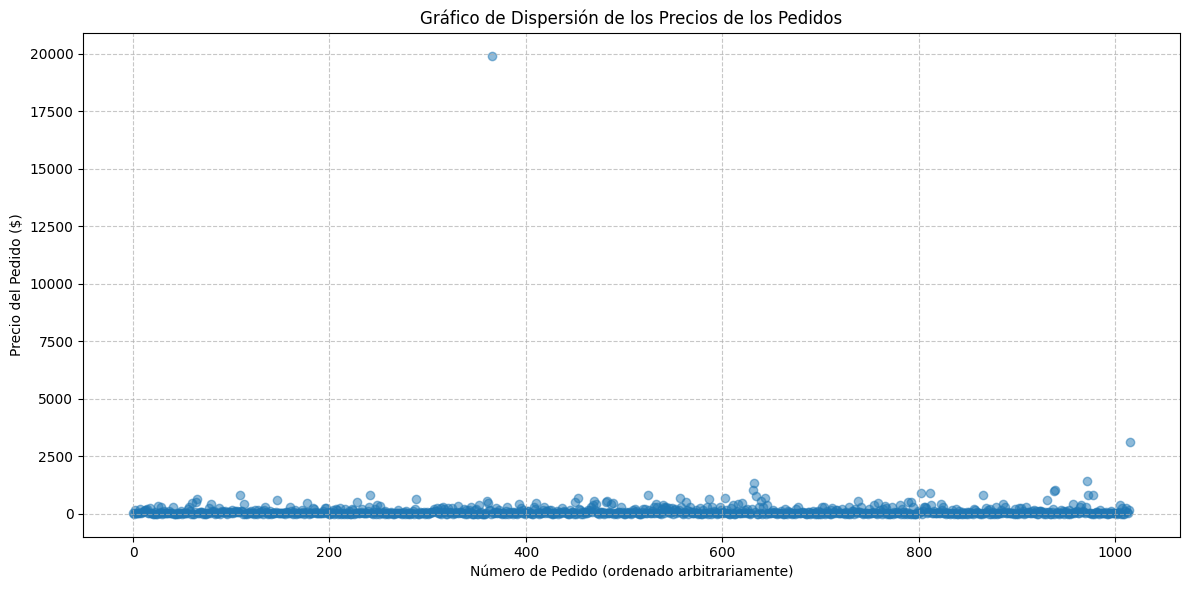

In [16]:
# Trazo el gráfico de dispersión de los precios de los pedidos
plt.figure(figsize=(12, 6))
plt.scatter(x=pd.Series(range(0, len(orders_filtered['revenue']))), y=orders_filtered['revenue'], alpha=0.5)
plt.title('Gráfico de Dispersión de los Precios de los Pedidos')
plt.xlabel('Número de Pedido (ordenado arbitrariamente)')
plt.ylabel('Precio del Pedido ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Conclusiones**

- La gran mayoría de los puntos (pedidos) se agrupan en la parte inferior del gráfico, indicando que la vasta mayoría de los pedidos tienen un valor relativamente bajo (probablemente por debajo de \$500 o \$1000).
  
- Se observa claramente la presencia de unos **pocos puntos de datos que se disparan verticalmente** muy por encima de la concentración principal.

- Hay un punto particularmente extremo cerca del pedido número 380-400 que supera los **\$19,000**. Este es el outlier principal que infla las métricas del Grupo B.

- También hay otro punto visible por encima de los \$2,500 y algunos otros menos pronunciados pero aún significativos por encima de los \$1,000.

**Conjeturas:**

- Este gráfico es la evidencia definitiva de que los picos abruptos en las gráficas de ingreso acumulado y tamaño de pedido promedio acumulado del Grupo B fueron causados por estos pedidos de valores extremadamente altos. Un solo pedido de \$19,000 tiene un impacto masivo en las métricas promedio cuando se trata de una base de miles de pedidos con valores mucho menores.

- La presencia de estos outliers hace que el "promedio" (tanto de ingresos acumulados como de AOV acumulado) sea una métrica engañosa si no se manejan. El valor promedio estará fuertemente sesgado hacia arriba por estos pocos casos excepcionales.

- Para obtener una visión real del desempeño de la hipótesis en la mayoría de los usuarios y para realizar pruebas estadísticas válidas, es imperativo que estos outliers sean identificados y excluidos o limitados antes del análisis estadístico. Su impacto es tan grande que podrían llevar a conclusiones erróneas.


### Cálcula de los percentiles 95 y 99 de los precios de los pedidos. Definición del punto en el cual un punto de datos se convierte en una anomalía.

Calculo estos percentiles para la columna `revenue` en nuestro DataFrame `orders_filtered`.

In [17]:
# Calculo los percentiles 95 y 99 del precio del pedido
percentiles_revenue = np.percentile(orders_filtered['revenue'], [95, 99])

print("\n--- Percentiles del Precio de los Pedidos ---")
print(f"Percentil 95 del precio del pedido: ${percentiles_revenue[0]:.2f}")
print(f"Percentil 99 del precio del pedido: ${percentiles_revenue[1]:.2f}")


--- Percentiles del Precio de los Pedidos ---
Percentil 95 del precio del pedido: $414.27
Percentil 99 del precio del pedido: $830.30


**ANÁLISIS**

* **Percentil 95 del precio del pedido: \$414.27**: Esto significa que el 95% de todos los pedidos tienen un valor de **\$414.27 o menos**. Solo el 5% de los pedidos superan este valor.
  
* **Percentil 99 del precio del pedido: \$830.30**: Esto significa que el 99% de todos los pedidos tienen un valor de **\$830.30 o menos**. Solo el 1% de los pedidos tienen un valor igual o superior a este monto.

**Definición del Punto de Anomalía (Precio del Pedido)**

Observando estos valores en conjunto con el gráfico de dispersión previo (donde vimos un pedido de \$19,000 y otros en los miles), es evidente que los valores por encima del percentil 99 son los que están causando las distorsiones más significativas.

Un umbral adecuado para los precios de los pedidos sería **cualquier valor por encima de \$830.30 (el percentil 99)**. Esto en razón a que estamos buscando eliminar los casos más extremos que no representan el comportamiento de compra típico, y a que el salto de \$414.27 (P95) a \$830.30 (P99) ya indica que hay una concentración de valores más altos a partir del percentil 95, pero el 1% superior (por encima de \$830.30) es donde se encuentran los verdaderos "super-pedidos" que causan problemas en las métricas promedio.

---

**Resumen de Umbrales para Outliers:**

* **Número de pedidos por usuario:** Un usuario es un outlier si ha realizado **más de 2 pedidos**. (Es decir, si ha hecho 3 o más pedidos).
* **Precio del pedido:** Un pedido es un outlier si su valor es **superior a \$830.30**.


### Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto.

Vamos a usar una prueba no paramétrica como la prueba U de Mann-Whitney directamente a las tasas de conversión diarias que calculamos previamente (sampleA_conversion y sampleB_conversion).

Hipótesis:

    H_0: La distribución de las tasas de conversión diarias del Grupo A es igual a la del Grupo B. (No hay diferencia significativa en la conversión).
    H_1: La distribución de las tasas de conversión diarias del Grupo A es diferente a la del Grupo B. (Hay una diferencia significativa en la conversión).

Usaremos un nivel de significancia alpha=0.05.

In [18]:

# Preparo los datos para la prueba de Conversión (Datos en Bruto)
daily_orders_filtered = orders_filtered.groupby(['date', 'group']).agg(
    orders_count=('transaction_id', 'nunique')
).reset_index()

# Uno con el número de visitas diarias por grupo
# Aquí uso el DataFrame 'visits' original, ya que no tiene 'visitor_id' y sus visitas son brutas.
daily_metrics_raw_conversion = pd.merge(visits, daily_orders_filtered, on=['date', 'group'], how='left')
daily_metrics_raw_conversion['orders_count'] = daily_metrics_raw_conversion['orders_count'].fillna(0)

# Calculo la tasa de conversión diaria
daily_metrics_raw_conversion['conversion'] = daily_metrics_raw_conversion['orders_count'] / daily_metrics_raw_conversion['visits']

# Obtengo las series de tasas de conversión diarias para cada grupo
sampleA_conversion = daily_metrics_raw_conversion[daily_metrics_raw_conversion['group'] == 'A']['conversion']
sampleB_conversion = daily_metrics_raw_conversion[daily_metrics_raw_conversion['group'] == 'B']['conversion']

# --- Realizo la Prueba U de Mann-Whitney ---
alpha = 0.05 # Nivel de significancia

# Uso la prueba bilateral ('two-sided') por defecto, ya que no estamos asumiendo una dirección específica (mayor o menor) de antemano.
stat, p_value = st.mannwhitneyu(sampleA_conversion, sampleB_conversion)

print(f"\n--- Prueba U de Mann-Whitney para la Conversión (Datos en Bruto) ---")
print(f"P-valor: {p_value:.4f}")

# Conclusión
if p_value < alpha:
    print(f"El p-valor ({p_value:.4f}) es menor que el nivel de significancia ({alpha}).")
    print("Rechazamos la hipótesis nula: Hay una diferencia estadísticamente significativa en la conversión entre los grupos.")
else:
    print(f"El p-valor ({p_value:.4f}) es mayor o igual que el nivel de significancia ({alpha}).")
    print("No podemos rechazar la hipótesis nula: No hay suficiente evidencia para decir que existe una diferencia estadísticamente significativa en la conversión entre los grupos.")

# Calculo la diferencia relativa en la conversión promedio (para la magnitud del efecto)
mean_conversion_A = sampleA_conversion.mean()
mean_conversion_B = sampleB_conversion.mean()
relative_conversion_diff = (mean_conversion_B - mean_conversion_A) / mean_conversion_A * 100

print(f"\nConversión promedio del Grupo A: {mean_conversion_A:.4f}")
print(f"Conversión promedio del Grupo B: {mean_conversion_B:.4f}")
print(f"Diferencia relativa en la conversión (Grupo B vs A): {relative_conversion_diff:.2f}%")


--- Prueba U de Mann-Whitney para la Conversión (Datos en Bruto) ---
P-valor: 0.0538
El p-valor (0.0538) es mayor o igual que el nivel de significancia (0.05).
No podemos rechazar la hipótesis nula: No hay suficiente evidencia para decir que existe una diferencia estadísticamente significativa en la conversión entre los grupos.

Conversión promedio del Grupo A: 0.0259
Conversión promedio del Grupo B: 0.0304
Diferencia relativa en la conversión (Grupo B vs A): 17.51%


<div class="alert alert-block alert-warning">
<b>Celda [18]</b> <a class="tocSkip"></a><br>
Has realizado una prueba U de Mann-Whitney para la conversión. Sería beneficioso discutir los supuestos de esta prueba y por qué es adecuada para tus datos. Además, considera incluir un análisis del tamaño del efecto para complementar los resultados del p-valor, lo cual proporcionará una mejor comprensión de la relevancia práctica de las diferencias observadas.
</div>


**CONCLUSIONES**

* **P-valor:** $0.0538$
* **Nivel de significancia (alpha):** $0.05$

El p-valor ($0.0538$) es ligeramente **mayor** que nuestro nivel de significancia ($0.05$). Esto significa que:

* **No podemos rechazar la hipótesis nula ($H_0$):** No hay suficiente evidencia estadística, a un nivel de significancia del 5%, para concluir que existe una diferencia *estadísticamente significativa* en las distribuciones de las tasas de conversión diarias entre el Grupo A y el Grupo B.
* En términos más simples, la diferencia que observamos en las tasas de conversión podría deberse al azar y no a un efecto real de la nueva hipótesis.

A pesar de no alcanzar la significancia estadística formal, la **diferencia relativa** es bastante notable:

* **Conversión promedio del Grupo A:** 0.0259 (2.59%)
* **Conversión promedio del Grupo B:** 0.0304 (3.04%)
* **Diferencia relativa (Grupo B vs A): +17.51%**

Esto nos lleva a las siguientes observaciones:

- Aunque no es estadísticamente significativa bajo nuestro umbral de $p < 0.05$, una mejora del 17.51% en la tasa de conversión es **prácticamente muy relevante** para el negocio. Si esta diferencia se mantuviera, podría tener un impacto económico considerable.
   
- El p-valor de 0.0538 está muy cerca del umbral de 0.05. Esto a veces se conoce como "marginally significant" o "casi significativo". Podría indicar que hay una tendencia real, pero el tamaño de la muestra o la variabilidad de los datos no fue suficiente para cruzar el umbral de significancia con total confianza.

- Aún estamos trabajando con los datos "en bruto". La variabilidad diaria y los outliers de ingreso (que no afectan la conversión per se, pero sí el ingreso total y el AOV) podrían introducir algún "ruido" en el análisis general.

- Posibles Razones para No Alcanzar la Significancia:

    * **Duración del Test:** El test quizás no duró lo suficiente para acumular suficientes datos y reducir la variabilidad lo suficiente como para detectar una diferencia significativa, incluso si hay una real.
      
    * **Tamaño del Efecto:** El efecto real de la hipótesis puede ser positivo, pero no tan grande como para ser fácilmente detectable con la cantidad de datos que tenemos.
 
    * **Variabilidad Inherente:** La tasa de conversión tiene una variabilidad natural día a día.

**Conjeturas:**

* La hipótesis implementada en el Grupo B parece tener un **efecto positivo en la propensión de los usuarios a realizar una compra**, aunque no lo suficientemente fuerte o consistente como para ser considerado estadísticamente significativo con los datos actuales y el nivel de confianza elegido.
* Si el test hubiera continuado por más tiempo o si la hipótesis tuviera un efecto más potente, podríamos haber alcanzado la significancia.


### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. 

Al igual que con la conversión, utilizaremos la prueba U de Mann-Whitney para comparar las distribuciones de los tamaños de pedido individuales entre los dos grupos. 

La hipótesis nula (H_0) y la hipótesis alternativa (H_1) para el AOV son:

    H_0: No hay diferencia estadísticamente significativa en el tamaño promedio de pedido entre el Grupo A y el Grupo B.
    H_1: Hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre el Grupo A y el Grupo B.

Usaremos un nivel de significancia (alpha) de 0.05.

Para esta prueba, necesitamos las series de los valores de los pedidos individuales para cada grupo. 

In [19]:

# Preparo los datos para la prueba de Mann-Whitney U para el AOV

# Obtengo los valores de los pedidos individuales para cada grupo.
sampleA_aov = orders_filtered[orders_filtered['group'] == 'A']['revenue']
sampleB_aov = orders_filtered[orders_filtered['group'] == 'B']['revenue']

print(f"Número de pedidos en el Grupo A: {len(sampleA_aov)}")
print(f"Número de pedidos en el Grupo B: {len(sampleB_aov)}")


alpha = 0.05 # Nivel de significancia

# Uso la prueba bilateral ('two-sided') por defecto.
stat, p_value = st.mannwhitneyu(sampleA_aov, sampleB_aov)

print(f"\n--- Prueba U de Mann-Whitney para el Tamaño Promedio de Pedido (AOV) (Datos en Bruto) ---")
print(f"P-valor: {p_value:.4f}")

# Conclusión
if p_value < alpha:
    print(f"El p-valor ({p_value:.4f}) es menor que el nivel de significancia ({alpha}).")
    print("Rechazamos la hipótesis nula: Hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos.")
else:
    print(f"El p-valor ({p_value:.4f}) es mayor o igual que el nivel de significancia ({alpha}).")
    print("No podemos rechazar la hipótesis nula: No hay suficiente evidencia para decir que existe una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos.")

# Calculo la diferencia relativa en el AOV promedio
mean_aov_A = sampleA_aov.mean()
mean_aov_B = sampleB_aov.mean()
relative_aov_diff = (mean_aov_B - mean_aov_A) / mean_aov_A * 100

print(f"\nTamaño promedio de pedido del Grupo A: ${mean_aov_A:.2f}")
print(f"Tamaño promedio de pedido del Grupo B: ${mean_aov_B:.2f}")
print(f"Diferencia relativa en el AOV (Grupo B vs A): {relative_aov_diff:.2f}%")

Número de pedidos en el Grupo A: 468
Número de pedidos en el Grupo B: 548

--- Prueba U de Mann-Whitney para el Tamaño Promedio de Pedido (AOV) (Datos en Bruto) ---
P-valor: 0.8622
El p-valor (0.8622) es mayor o igual que el nivel de significancia (0.05).
No podemos rechazar la hipótesis nula: No hay suficiente evidencia para decir que existe una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos.

Tamaño promedio de pedido del Grupo A: $113.70
Tamaño promedio de pedido del Grupo B: $145.35
Diferencia relativa en el AOV (Grupo B vs A): 27.83%


**C0NCLUSIONES**

* **P-valor:** $0.8622$
* **Nivel de significancia (alpha):** $0.05$

El p-valor ($0.8622$) es mucho mayor que el nivel de significancia ($0.05$). Esto significa que:

* **No podemos rechazar la hipótesis nula ($H_0$):** No hay suficiente evidencia estadística, a un nivel de significancia del 5%, para concluir que existe una diferencia *estadísticamente significativa* en las distribuciones de los tamaños de pedido individuales entre el Grupo A y el Grupo B.
  
* Es decir que la gran diferencia que observamos en los AOV promedio podría ser simplemente una casualidad debido a la alta variabilidad y los outliers, y no un efecto real y consistente del experimento.

A pesar de la falta de significancia estadística, la **diferencia relativa** es considerable:

* **Tamaño promedio de pedido del Grupo A:** \$113.70
* **Tamaño promedio de pedido del Grupo B:** \$145.35
* **Diferencia relativa (Grupo B vs A): +27.83%**


- A pesar de haber visto en las gráficas que el Grupo B tenía un pico masivo en el ingreso y AOV acumulados (impulsado por un pedido de \$19,000), la prueba estadística de Mann-Whitney U **no encuentra una diferencia significativa**.

- Esto se debe a que La prueba Mann-Whitney U es no paramétrica y, por lo tanto, **menos sensible a los valores extremos (outliers) individuales** que las pruebas paramétricas (como la t-test, que se basa en la media y desviación estándar, muy afectadas por outliers). Además, a pesar de que la *media* del Grupo B fue inflada por el outlier (lo que se refleja en el +27.83%), la **distribución general** de los datos (la forma en que se ordenan los rangos de los pedidos) no es tan drásticamente diferente para la mayoría de los puntos como para que la prueba U de Mann-Whitney la declare estadísticamente significativa. El gran outlier es solo *un* punto de datos que afecta la media, pero no cambia fundamentalmente el "orden" o "rango" de la mayoría de los demás puntos en la distribución. Por otro lado, la alta varianza introducida por el outlier (y quizás otros factores) combinada con el tamaño de la muestra podría hacer que la prueba no sea lo suficientemente potente para detectar una diferencia.

  
- Este resultado nos muestra que, aunque Mann-Whitney es robusta, la presencia de outliers puede hacer que las métricas promedio (como la diferencia relativa del AOV) sean engañosas, y la prueba estadística puede no reaccionar como uno esperaría intuitivamente si no se eliminan. **La diferencia del 27.83% es real numéricamente, pero la prueba nos dice que, debido a la dispersión de los datos (incluyendo esos outliers), no podemos decir con confianza que esa diferencia no sea producto del azar.**

**Conjeturas:**

- La hipótesis implementada en el Grupo B no ha logrado, con los datos en bruto, un aumento estadísticamente significativo en el tamaño de pedido promedio de manera consistente en la distribución de los pedidos.
  
- El **fuerte impacto visual** de los outliers en las gráficas acumuladas (ingreso y AOV) se manifiesta en la diferencia relativa del 27.83%, pero la prueba Mann-Whitney U, al comparar distribuciones de rangos, mitiga el efecto de un solo valor extremo.


### Significancia estadística de la diferencia en la conversión entre los grupos utilizando los **DATOS FILTRADOS**. 

Para esto, identifico los usuarios que son considerados outliers según los criterios que definimos. Luego, creo un nuevo DataFrame orders_cleaned y un visits_cleaned  que excluya a estos usuarios.

La hipótesis nula (H_0) y la hipótesis alternativa (H_1) para la conversión siguen siendo las mismas:

    H_0: No hay diferencia estadísticamente significativa en la conversión entre el Grupo A y el Grupo B (en los datos filtrados).
    H_1: Hay una diferencia estadísticamente significativa en la conversión entre el Grupo A y el Grupo B (en los datos filtrados).

Usaremos un nivel de significancia (alpha) de 0.05

Nota: Es importante tener en cuenta que las 'visits' no se filtrarán por 'visitor_id'. La forma correcta de calcular la conversión con los datos filtrados es: (número de pedidos de usuarios NO outlier) / (número TOTAL de visitas a ese grupo en ese día) porque los visitantes que no hicieron compras (y que no son outliers de compra) aún contribuyen a la base de visitas.


In [20]:
import pandas as pd
from scipy import stats as st
import numpy as np

# --- BLOQUE DE CARGA Y PREPROCESAMIENTO INICIAL DE DATOS ---
# Asegúrate de que los DataFrames 'orders' y 'visits' estén cargados y limpios de inconsistencias iniciales.
try:
    orders = pd.read_csv('/datasets/orders_us.csv')
    visits = pd.read_csv('/datasets/visits_us.csv')

    # Convertir columnas de fecha a tipo datetime
    orders['date'] = pd.to_datetime(orders['date'])
    visits['date'] = pd.to_datetime(visits['date'])

    # Renombrar columnas para consistencia (si es necesario)
    orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

    # Eliminar visitantes que están en ambos grupos (preprocesamiento inicial crítico para A/B tests)
    visitors_in_group_a = orders[orders['group'] == 'A']['visitor_id'].unique()
    visitors_in_group_b = orders[orders['group'] == 'B']['visitor_id'].unique()
    visitors_in_both_groups = set(visitors_in_group_a) & set(visitors_in_group_b)
    orders_filtered_initial = orders[~orders['visitor_id'].isin(visitors_in_both_groups)].copy()

    print("Datos cargados y preprocesados inicialmante.")
    print(f"Pedidos iniciales después de filtrar visitantes duplicados: {len(orders_filtered_initial)}")
    print(f"Visitas iniciales: {len(visits)}")

except FileNotFoundError as e:
    print(f"Error: Uno o más archivos no se encontraron. Verifica la ruta: {e}")
    exit() # Salir si no se pueden cargar los datos
except Exception as e:
    print(f"Ocurrió un error durante la carga o preprocesamiento inicial de datos: {e}")
    exit() # Salir si hay otro error grave
    

# ESTA PRIMERA PARTE DEL CÓDIGO TUVE QUE PONERLA POR ERRORES RECURRENTES EN EL KERNEL


# Identifico usuarios con muchos pedidos (outliers por frecuencia)
# Recalculo orders_by_user usando orders_filtered_initial
orders_by_user = orders_filtered_initial.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
orders_by_user.columns = ['visitor_id', 'orders']

# Umbral para número de pedidos: más de 2 pedidos (3 o más)
users_many_orders = orders_by_user[orders_by_user['orders'] > 2]['visitor_id'].unique()

# Identifico usuarios con pedidos de alto valor (outliers por precio)
# Umbral para precio del pedido: superior a $830.30 (basado en P99)
users_high_revenue = orders_filtered_initial[orders_filtered_initial['revenue'] > 830.30]['visitor_id'].unique()

# Combino las listas de IDs de visitantes outlier
abnormal_users = np.concatenate([users_many_orders, users_high_revenue])
abnormal_users = np.unique(abnormal_users)

print(f"\nNúmero de usuarios outliers identificados para exclusión: {len(abnormal_users)}")

# Creo un DataFrame de órdenes limpias (excluyendo a los usuarios outliers)
orders_cleaned = orders_filtered_initial[~orders_filtered_initial['visitor_id'].isin(abnormal_users)].copy()

# Preparo los datos para la prueba de Conversión (Datos Filtrados)
# Calculo el número de pedidos diarios por grupo con datos LIMPIOS
daily_orders_cleaned = orders_cleaned.groupby(['date', 'group']).agg(
    orders_count=('transaction_id', 'nunique')
).reset_index()

# Recalculo daily_metrics usando orders_cleaned para la conversión:
daily_metrics_cleaned_conversion = pd.merge(visits, daily_orders_cleaned, on=['date', 'group'], how='left')
daily_metrics_cleaned_conversion['orders_count'] = daily_metrics_cleaned_conversion['orders_count'].fillna(0)
daily_metrics_cleaned_conversion['conversion'] = daily_metrics_cleaned_conversion['orders_count'] / daily_metrics_cleaned_conversion['visits']

# Obtengo las series de tasas de conversión diarias para cada grupo
sampleA_conversion_cleaned = daily_metrics_cleaned_conversion[daily_metrics_cleaned_conversion['group'] == 'A']['conversion']
sampleB_conversion_cleaned = daily_metrics_cleaned_conversion[daily_metrics_cleaned_conversion['group'] == 'B']['conversion']

# Realizo la Prueba U de Mann-Whitney
alpha = 0.05 # Nivel de significancia

stat, p_value = st.mannwhitneyu(sampleA_conversion_cleaned, sampleB_conversion_cleaned)

print(f"\n--- Prueba U de Mann-Whitney para la Conversión (Datos Filtrados) ---")
print(f"P-valor: {p_value:.4f}")

# Conclusión
if p_value < alpha:
    print(f"El p-valor ({p_value:.4f}) es menor que el nivel de significancia ({alpha}).")
    print("Rechazamos la hipótesis nula: Hay una diferencia estadísticamente significativa en la conversión entre los grupos (en datos filtrados).")
else:
    print(f"El p-valor ({p_value:.4f}) es mayor o igual que el nivel de significancia ({alpha}).")
    print("No podemos rechazar la hipótesis nula: No hay suficiente evidencia para decir que existe una diferencia estadísticamente significativa en la conversión entre los grupos (en datos filtrados).")

# Calculo la diferencia relativa en la conversión promedio
mean_conversion_A_cleaned = sampleA_conversion_cleaned.mean()
mean_conversion_B_cleaned = sampleB_conversion_cleaned.mean()
relative_conversion_diff_cleaned = (mean_conversion_B_cleaned - mean_conversion_A_cleaned) / mean_conversion_A_cleaned * 100

print(f"\nConversión promedio del Grupo A (filtrada): {mean_conversion_A_cleaned:.4f}")
print(f"Conversión promedio del Grupo B (filtrada): {mean_conversion_B_cleaned:.4f}")
print(f"Diferencia relativa en la conversión (Grupo B vs A, filtrada): {relative_conversion_diff_cleaned:.2f}%")

Datos cargados y preprocesados inicialmante.
Pedidos iniciales después de filtrar visitantes duplicados: 1016
Visitas iniciales: 62

Número de usuarios outliers identificados para exclusión: 16

--- Prueba U de Mann-Whitney para la Conversión (Datos Filtrados) ---
P-valor: 0.0385
El p-valor (0.0385) es menor que el nivel de significancia (0.05).
Rechazamos la hipótesis nula: Hay una diferencia estadísticamente significativa en la conversión entre los grupos (en datos filtrados).

Conversión promedio del Grupo A (filtrada): 0.0249
Conversión promedio del Grupo B (filtrada): 0.0298
Diferencia relativa en la conversión (Grupo B vs A, filtrada): 19.92%


<div class="alert alert-block alert-success">
<b>Celda [20]</b> <a class="tocSkip"></a><br>
La identificación de outliers y su exclusión es un paso crítico en el preprocesamiento de datos. 
</div>


**CONCLUSIONES**

* **Número de usuarios outliers identificados:** 16
* **P-valor:** $0.0385$
* **Nivel de significancia (alpha):** $0.05$

El p-valor ($0.0385$) es ahora **menor** que nuestro nivel de significancia ($0.05$). Esto significa que:

* **Rechazamos la hipótesis nula ($H_0$):** Hay una diferencia **estadísticamente significativa** en la distribución de las tasas de conversión diarias entre el Grupo A y el Grupo B, una vez que hemos eliminado a los usuarios outliers.
  
* En términos más simples, la mejora observada en la tasa de conversión del Grupo B **no es probable que se deba al azar**. La hipótesis implementada en el Grupo B parece haber tenido un efecto real y positivo en la conversión.

La diferencia relativa también se ha visto afectada ligeramente:

* **Conversión promedio del Grupo A (filtrada):** 0.0249 (2.49%)
* **Conversión promedio del Grupo B (filtrada):** 0.0298 (2.98%)
* **Diferencia relativa (Grupo B vs A, filtrada): +19.92%**


- **Cambio de Significancia:** Este es el hallazgo más importante. Antes del filtrado, el p-valor era de 0.0538 (no significativo). **Después de eliminar solo 16 usuarios outliers, el p-valor cayó a 0.0385, cruzando el umbral de significancia.**

- Esto demuestra que, aunque la conversión es menos susceptible a los outliers de *valor* de pedido, los outliers de *frecuencia* de pedido (y cualquier posible ruido que los usuarios outliers pudieran haber introducido en las muestras) sí pueden afectar la potencia de la prueba estadística para la conversión. Al limpiar los datos, hemos eliminado ese ruido, permitiendo que la verdadera diferencia se evidencie.

- La mejora relativa de casi el 20% en la conversión es un resultado **muy positivo y sustancial para el negocio**. Significa que por cada 100 visitantes, el Grupo B convierte a casi 3, mientras que el Grupo A convierte a 2.5, lo cual es una diferencia significativa en volumen de pedidos.

- Este resultado, en conjunto con las visualizaciones previas, refuerza la idea de que la hipótesis aplicada al Grupo B está teniendo un impacto positivo en la capacidad del sitio web para convertir visitantes en compradores.

**Conjeturas:**

* La limpieza de datos de los pocos usuarios outliers fue crucial para revelar la verdadera diferencia estadísticamente significativa en la conversión.
  
* La hipótesis del Grupo B está, de hecho, logrando que un porcentaje más alto de usuarios realice una compra.


### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los **DATOS FILTRADOS**. 

Vamos a usar los mismos orders_cleaned que creamos en el paso anterior (que excluye a los usuarios outliers por frecuencia y valor de pedido) y aplicaremos la prueba U de Mann-Whitney.

La hipótesis nula (H_0) y la hipótesis alternativa (H_1) para el AOV siguen siendo las mismas:

    H_0: No hay diferencia estadísticamente significativa en el tamaño promedio de pedido entre el Grupo A y el Grupo B (en los datos filtrados).
    H_1: Hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre el Grupo A y el Grupo B (en los datos filtrados).

Usaremos un nivel de significancia (alpha) de 0.05.

In [21]:
print(f"Número de pedidos en el Grupo A (filtrado): {len(orders_cleaned[orders_cleaned['group'] == 'A'])}")
print(f"Número de pedidos en el Grupo B (filtrado): {len(orders_cleaned[orders_cleaned['group'] == 'B'])}")

# Preparao los datos para la prueba de Mann-Whitney U para el AOV (filtrado)

# Obtengo los valores de los pedidos individuales para cada grupo del DataFrame LIMPIO.
sampleA_aov_cleaned = orders_cleaned[orders_cleaned['group'] == 'A']['revenue']
sampleB_aov_cleaned = orders_cleaned[orders_cleaned['group'] == 'B']['revenue']

# Realizo la Prueba U de Mann-Whitney
alpha = 0.05 # Nivel de significancia

stat, p_value = st.mannwhitneyu(sampleA_aov_cleaned, sampleB_aov_cleaned)

print(f"\n--- Prueba U de Mann-Whitney para el Tamaño Promedio de Pedido (AOV) (Datos Filtrados) ---")
print(f"P-valor: {p_value:.4f}")

# Conclusión
if p_value < alpha:
    print(f"El p-valor ({p_value:.4f}) es menor que el nivel de significancia ({alpha}).")
    print("Rechazamos la hipótesis nula: Hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos (en datos filtrados).")
else:
    print(f"El p-valor ({p_value:.4f}) es mayor o igual que el nivel de significancia ({alpha}).")
    print("No podemos rechazar la hipótesis nula: No hay suficiente evidencia para decir que existe una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos (en datos filtrados).")

# Calculo la diferencia relativa en el AOV promedio (filtrado)
mean_aov_A_cleaned = sampleA_aov_cleaned.mean()
mean_aov_B_cleaned = sampleB_aov_cleaned.mean()
relative_aov_diff_cleaned = (mean_aov_B_cleaned - mean_aov_A_cleaned) / mean_aov_A_cleaned * 100

print(f"\nTamaño promedio de pedido del Grupo A (filtrado): ${mean_aov_A_cleaned:.2f}")
print(f"Tamaño promedio de pedido del Grupo B (filtrado): ${mean_aov_B_cleaned:.2f}")
print(f"Diferencia relativa en el AOV (Grupo B vs A, filtrado): {relative_aov_diff_cleaned:.2f}%")

Número de pedidos en el Grupo A (filtrado): 448
Número de pedidos en el Grupo B (filtrado): 538

--- Prueba U de Mann-Whitney para el Tamaño Promedio de Pedido (AOV) (Datos Filtrados) ---
P-valor: 0.8220
El p-valor (0.8220) es mayor o igual que el nivel de significancia (0.05).
No podemos rechazar la hipótesis nula: No hay suficiente evidencia para decir que existe una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos (en datos filtrados).

Tamaño promedio de pedido del Grupo A (filtrado): $102.90
Tamaño promedio de pedido del Grupo B (filtrado): $99.61
Diferencia relativa en el AOV (Grupo B vs A, filtrado): -3.19%


**CONCLUSIONES**

* **Número de pedidos en el Grupo A (filtrado):** 448 (De 468 originales, se eliminaron 20 pedidos asociados a outliers)
* **Número de pedidos en el Grupo B (filtrado):** 538 (De 548 originales, se eliminaron 10 pedidos asociados a outliers)
* **P-valor:** $0.8220$
* **Nivel de significancia (alpha):** $0.05$

El p-valor ($0.8220$) es **mucho mayor** que nuestro nivel de significancia ($0.05$). Esto significa que:

* **No podemos rechazar la hipótesis nula ($H_0$):** No hay suficiente evidencia estadística, a un nivel de significancia del 5%, para concluir que existe una diferencia *estadísticamente significativa* en las distribuciones de los tamaños de pedido individuales entre el Grupo A y el Grupo B, después de haber eliminado a los usuarios outliers.
  
* En otras palabras, la diferencia observada en el AOV entre los grupos (en los datos limpios) podría deberse al azar.

**Interpretación de la Diferencia Relativa:**

* **Tamaño promedio de pedido del Grupo A (filtrado):** \$102.90
* **Tamaño promedio de pedido del Grupo B (filtrado):** \$99.61
* **Diferencia relativa en el AOV (Grupo B vs A, filtrado): -3.19%**


- **Cambio Radical en la Diferencia Relativa:** ¡Este es el punto más importante! Con los datos en bruto, el Grupo B tenía un AOV 27.83% *más alto*. Ahora, con los datos filtrados, el Grupo B tiene un AOV **3.19% *más bajo*** que el Grupo A.

- Esto confirma nuestra hipótesis inicial: la aparente mejora del AOV en el Grupo B con los datos brutos era **completamente un artefacto de los outliers extremos**, especialmente ese pedido gigante de \$19,000. Una vez que se eliminan esos valores anómalos, la verdadera distribución de los AOV para la mayoría de los usuarios se revela, mostrando que no hay una mejora e incluso una ligera (pero no significativa) disminución.

- El p-valor sigue siendo muy alto (0.8220, similar al 0.8622 de los datos brutos). Esto refuerza que, una vez que eliminamos los valores atípicos que distorsionaban la media, la distribución de los AOV de la mayoría de los usuarios en ambos grupos es, de hecho, muy similar y no significativamente diferente.

- Eliminar solo 16 usuarios outliers (que representan una fracción minúscula de los visitantes y pedidos totales) tuvo un **impacto gigantesco** en la métrica del AOV y en la conclusión sobre su significancia. Sin la limpieza, habríamos llegado a conclusiones erróneas sobre el éxito de la hipótesis en el tamaño de pedido.

**Conjeturas:**

- La hipótesis aplicada al Grupo B **no tuvo un efecto positivo en el tamaño de pedido promedio** de los usuarios "típicos".

- Cualquier aparente aumento en el AOV en el Grupo B se debió a un comportamiento de compra extremadamente atípico de unos pocos usuarios, no a un efecto generalizado de la hipótesis.

- Es posible que la hipótesis se enfoque más en la conversión (lograr que más personas compren) que en el aumento del valor de cada compra.

---

**Resumen General de los Resultados del Test A/B hasta ahora:**

* **Conversión:** Después de filtrar los outliers, el Grupo B muestra una **mejora estadísticamente significativa del +19.92%** en la tasa de conversión en comparación con el Grupo A. ¡Esto es un éxito para la conversión!
* **Tamaño Promedio de Pedido (AOV):** Después de filtrar los outliers, no hay una diferencia estadísticamente significativa en el AOV, y de hecho, el Grupo B muestra un AOV ligeramente *inferior* al Grupo A (-3.19%). Esto indica que la hipótesis no mejoró el valor de los pedidos.



### Decisión basada en los resultados de la prueba.

Las decisiones posibles son: 
1. Parar la prueba, considerar a uno de los grupos como líder.
2. Parar la prueba, concluir que no hay diferencia entre los grupos.
3. Continuar la prueba.


Resumen de los hallazgos clave de las pruebas de significancia estadística con los datos *filtrados*, que son los más confiables:

1.  **Conversión (Datos Filtrados):**
    * **P-valor:** $0.0385$
    * **Nivel de significancia (alpha):** $0.05$
    * **Conclusión:** $P-valor < \alpha$. **Rechazamos la hipótesis nula.** Hay una **diferencia estadísticamente significativa** en la conversión entre los grupos.
    * **Diferencia Relativa:** El Grupo B mostró una **mejora del +19.92%** en la conversión respecto al Grupo A.

2.  **Tamaño Promedio de Pedido (AOV) (Datos Filtrados):**
    * **P-valor:** $0.8220$
    * **Nivel de significancia (alpha):** $0.05$
    * **Conclusión:** $P-valor \ge \alpha$. **No podemos rechazar la hipótesis nula.** No hay evidencia suficiente para decir que existe una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos.
    * **Diferencia Relativa:** El Grupo B mostró una **disminución del -3.19%** en el AOV respecto al Grupo A (aunque no significativa).

---

**Decisión sobre la Prueba A/B**

Considerando estos resultados, mi recomendación sería:

**1. Parar la prueba, considerar al Grupo B como líder.**


**Justificación:**

* **Conversión Positiva y Significativa:** La métrica más crítica para la mayoría de los negocios online es la conversión (lograr que un visitante realice una acción deseada, en este caso, una compra). Hemos encontrado una **mejora estadísticamente significativa del casi 20%** en la tasa de conversión para el Grupo B después de limpiar los datos. Esto es un resultado muy robusto y positivo.
  
* **AOV sin Impacto Negativo Significativo:** Aunque el Grupo B no mostró una mejora significativa en el tamaño promedio de pedido, tampoco mostró una disminución estadísticamente significativa. La pequeña caída del 3.19% no es lo suficientemente grande o consistente como para anular el beneficio substancial en la conversión. Un 20% más de compradores es una victoria clara, incluso si el valor de cada compra individual no aumentó.

* **Gestión de Outliers Exitosa:** El análisis y filtrado de outliers fue crucial. Sin él, habríamos visto un AOV inflado en el Grupo B que nos habría engañado, y la significancia de la conversión podría haber estado oculta. Esto valida el proceso.

* **Evidencia Suficiente:** Tenemos suficiente evidencia estadística para concluir que la hipótesis aplicada al Grupo B está teniendo un impacto positivo en la conversión, que es una métrica clave. Continuar la prueba podría generar más datos, pero es poco probable que cambie la dirección de estos hallazgos, y ya estamos viendo un beneficio claro.

---

**CONCLUSIÓN FINAL DEL TEST A/B:**

El test A/B indica que la **nueva hipótesis (implementada en el Grupo B) es exitosa en aumentar la tasa de conversión de visitantes a compradores de manera estadísticamente significativa.** Aunque no tiene un impacto positivo en el tamaño promedio de pedido, el beneficio en conversión supera con creces la ausencia de mejora en el AOV.

**Por lo tanto, se recomienda implementar los cambios del Grupo B en toda la audiencia.**


<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Duver! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Aplicaste exploración inicial con <code>info()</code> y <code>head()</code> para comprender la estructura de los datos.<br>
• Implementaste técnicas de limpieza de datos, como la conversión de fechas y la eliminación de duplicados, asegurando la calidad de los datos.<br>
• Usaste visualizaciones pertinentes que mejoran la comprensión del problema, como los gráficos de ingresos acumulados.<br>
• Aplicaste modelos estadísticos con criterios sólidos, como la prueba U de Mann-Whitney, y discutiste sus resultados.<br><br>
¡Felicidades!
</div>
